# Intro to RDKit

https://www.rdkit.org/docs/GettingStartedInPython.html

# Basic I/O

The majority of the basic molecular functionality is found in module `rdkit.Chem`:

In [1]:
from rdkit import Chem

In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1') # m: rdkit.Chem.rdchem.Mol

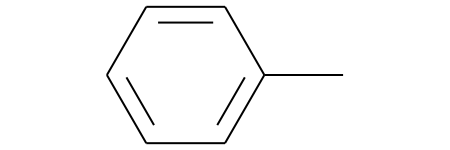

In [3]:
m

In [6]:
print(m)

In [4]:
type(m) # check the instance of 'm'

rdkit.Chem.rdchem.Mol

In [5]:
m2 = Chem.MolFromSmiles("C1CCCCC2") # wrong SMILE

RDKit ERROR: [21:55:08] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2'
[21:55:08] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2'


In [8]:
all_drugs= []
with open("data/drugs.smi", "r") as fin : # fin : file pointer
    for l in fin : # read line by line
        smi = l.strip() #string.strip() delete any space, \n, \t on the most front and back of string
        m = Chem.MolFromSmiles(smi)
        all_drugs.append(m)

In [9]:
print(all_drugs)

[<rdkit.Chem.rdchem.Mol object at 0x2b3fa41717c0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa41716a0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171640>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171820>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa41718e0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171880>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171940>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa41719a0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171a00>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171a60>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171b80>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171b20>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171c40>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171be0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171580>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171ca0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171dc0>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171d60>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171d00>, <rdkit.Chem.rdchem.Mol object at 0x2b3fa4171e20>,

In [10]:
len(all_drugs)

600

Reading sets of molecules

In [11]:
suppl = Chem.SDMolSupplier('data/drugs.sdf') # read multiple molecules from sdf file

In [12]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [ ]:
for mol in suppl:
    print(mol.GetNumAtoms()) # mol : variable, GetNumAtoms() : method

In [15]:
# print with index
idx = 0 # index
for m in suppl :
    num_atom = m.GetNumAtoms()
    print(f"Mol No. {idx} : {num_atom} atmos.")
    idx += 1

Mol No. 0 : 25 atmos.
Mol No. 1 : 11 atmos.
Mol No. 2 : 13 atmos.
Mol No. 3 : 19 atmos.
Mol No. 4 : 36 atmos.
Mol No. 5 : 10 atmos.
Mol No. 6 : 13 atmos.
Mol No. 7 : 16 atmos.
Mol No. 8 : 21 atmos.
Mol No. 9 : 21 atmos.
Mol No. 10 : 25 atmos.
Mol No. 11 : 26 atmos.
Mol No. 12 : 7 atmos.
Mol No. 13 : 30 atmos.
Mol No. 14 : 23 atmos.
Mol No. 15 : 19 atmos.
Mol No. 16 : 20 atmos.
Mol No. 17 : 10 atmos.
Mol No. 18 : 18 atmos.
Mol No. 19 : 19 atmos.
Mol No. 20 : 17 atmos.
Mol No. 21 : 17 atmos.
Mol No. 22 : 20 atmos.
Mol No. 23 : 17 atmos.
Mol No. 24 : 20 atmos.
Mol No. 25 : 13 atmos.
Mol No. 26 : 15 atmos.
Mol No. 27 : 29 atmos.
Mol No. 28 : 16 atmos.
Mol No. 29 : 31 atmos.
Mol No. 30 : 20 atmos.
Mol No. 31 : 19 atmos.
Mol No. 32 : 16 atmos.
Mol No. 33 : 25 atmos.
Mol No. 34 : 16 atmos.
Mol No. 35 : 20 atmos.
Mol No. 36 : 21 atmos.
Mol No. 37 : 24 atmos.
Mol No. 38 : 10 atmos.
Mol No. 39 : 23 atmos.
Mol No. 40 : 26 atmos.
Mol No. 41 : 44 atmos.
Mol No. 42 : 25 atmos.
Mol No. 43 : 21 atmos.

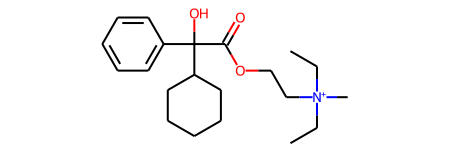

In [16]:
suppl[0]

In [25]:
# list comprehension
large_mole = [mol for mol in suppl if mol.GetNumAtoms() >= 50]

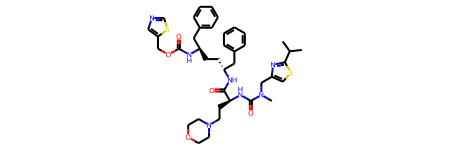

In [26]:
large_mole[-2]

Writing molecules
1) SMILES
2) 3D coordinate

In [27]:
print(Chem.MolToSmiles(large_mole[-2]))

CC(C)c1nc(CN(C)C(=O)N[C@@H](CCN2CCOCC2)C(=O)N[C@H](CC[C@H](Cc2ccccc2)NC(=O)OCc2cncs2)Cc2ccccc2)cs1


@ : counter-clockwise  
@@ : clockwise

In [31]:
Chem.MolToSmiles(large_mole[-2], isomericSmiles=False, kekuleSmiles=False) #without chriality
#ref : https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html

'CC(C)c1nc(CN(C)C(=O)NC(CCN2CCOCC2)C(=O)NC(CCC(Cc2ccccc2)NC(=O)OCc2cncs2)Cc2ccccc2)cs1'

Kekule form of the SMILES

In [33]:
m3 = Chem.MolFromSmiles('C1=CC=CN=C1')
Chem.Kekulize(m3) #Kekulize the molecule
Chem.MolToSmiles(m3,kekuleSmiles=True)

'C1=CC=NC=C1'

In [34]:
# MDL Mol blocks
print(Chem.MolToMolBlock(m3)) 


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [36]:
m3.SetProp("_Name","pyrimidine") #SetProp : set property
print(Chem.MolToMolBlock(m3)) 

pyrimidine
     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [35]:
# show the method of instance 'm3'
dir(m3)

['AddConformer',
 'ClearComputedProps',
 'ClearProp',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasSubstructMatch',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveConformer',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache',
 '__DebugMol',
 '__GetSubstructMatch',
 '__GetSubstructMatches',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__gt__',
 '__hash__',
 '__

In [37]:
# add hydrogen
m3_H = Chem.AddHs(m3) # warning! this function returns a new molecules

In [38]:
print(Chem.MolToMolBlock(m3_H))

pyrimidine
     RDKit          2D

 11 11  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  6 11  1  0
M  END



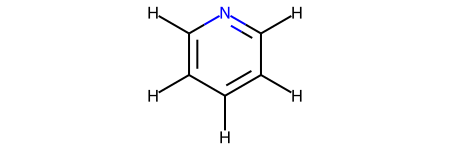

In [39]:
m3_H

In [40]:
m4 = large_mole[-2]

In [42]:
m4_H = Chem.AddHs(m4)

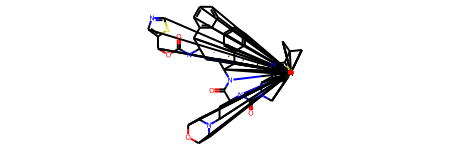

In [43]:
m4_H
#something is wrong in H atoms

In [45]:
print(Chem.MolToMolBlock(m4_H))
# the positions of H atoms are wrong in large molecule. We need to compute 2D coordinate.


     RDKit          2D

107111  0  0  1  0  0  0  0  0999 V2000
    0.9013    1.8841    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0933    1.7796    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6810    2.5886    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5000    0.8660    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4781    0.6581    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5827   -0.3364    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4487   -0.8364    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4487   -1.8364    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5827   -2.3364    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3147   -2.3364    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3147   -3.3364    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1808   -1.8364    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0468   -2.3364    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9128   -2.8364    0

In [46]:
from rdkit.Chem import AllChem
#Chem contains the primary function
#Allchem contains the all function

In [47]:
AllChem.Compute2DCoords(m4_H)

0

In [48]:
print(Chem.MolToMolBlock(m4_H))


     RDKit          2D

107111  0  0  1  0  0  0  0  0999 V2000
    9.3830    4.4440    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.7233    3.0969    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.3762    3.7565    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.0636    1.7497    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5860    1.4916    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.3749    0.0065    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0494   -0.6956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7238   -1.3977    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.6691   -2.8967    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4530   -0.6009    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6085    0.3709    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1275   -1.3030    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1433   -0.5061    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6536    0.7647    0

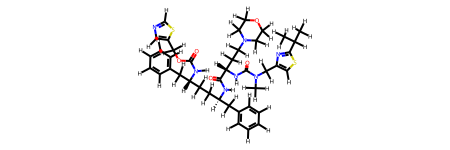

In [49]:
m4_H

To get 3D coordinate of molecules is difficult. For example, consider cis and trans isomer. It would take cis, trans, gauch form. Finding the 3D coordinate with lowest energy is difficult. So, rdkit use the approximation to speed up.

In [50]:
AllChem.EmbedMolecule(m4_H)

0

In [51]:
print(Chem.MolToMolBlock(m4_H))


     RDKit          3D

107111  0  0  1  0  0  0  0  0999 V2000
    9.5633    3.5235   -0.7668 C   0  0  0  0  0  0  0  0  0  0  0  0
    9.0410    2.2581   -0.1615 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.1850    2.6113    1.0351 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.1220    1.5664   -1.1425 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0142    2.0303   -1.7002 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.3506    1.2869   -2.5224 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0732    1.7471   -3.2011 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0400    1.7706   -2.1956 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7724    3.0097   -1.5009 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3010    0.5984   -1.8995 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5367   -0.4815   -2.5022 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.2831    0.6269   -0.9151 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5109   -0.5072   -0.5530 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.7093   -0.9239    0

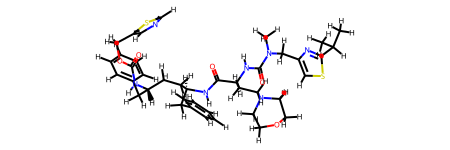

In [52]:
m4_H

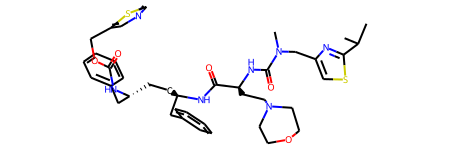

In [55]:
# remove H
m4_noH = Chem.RemoveHs(m4_H)
m4_noH

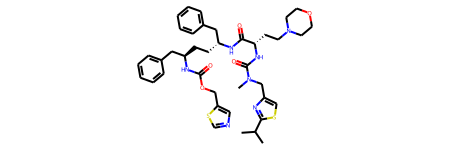

In [57]:
# to convert 3D into 2D
AllChem.Compute2DCoords(m4_noH)
m4_noH

# Fingerprint

In [61]:
molecules = []
for smi in open("data/drugs.smi").readlines():
    m = Chem.MolFromSmiles(smi)
    m2 = Chem.AddHs(m)
    molecules.append(m2)
print(len(molecules))

600


In [62]:
m1 = molecules[0]
m2 = molecules[1]

In [63]:
from rdkit.Chem import AllChem

In [64]:
fp1 = AllChem.GetMorganFingerprint(m1,2) # iteration
fp2 = AllChem.GetMorganFingerprint(m2,2)

In [66]:
print(fp1)

In [67]:
dir(fp1) # to check what method we can use.

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'ToList',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [68]:
fp1.GetNonzeroElements() #fragment list and the number of fragment in a molecule

{10565946: 1,
 36538691: 1,
 56091288: 7,
 231329144: 1,
 295224923: 1,
 490247508: 6,
 618185734: 1,
 631553871: 1,
 658782932: 1,
 772606658: 1,
 829315160: 2,
 864942730: 1,
 886246489: 1,
 1101907775: 1,
 1319199979: 1,
 1461310226: 1,
 1665999679: 1,
 1957005222: 1,
 2013031783: 1,
 2041434490: 2,
 2092489639: 1,
 2277419761: 1,
 2912088145: 1,
 2976816164: 1,
 3067762898: 1,
 3210252437: 1,
 3217380708: 13,
 3265829077: 1,
 3352400832: 1,
 3430949351: 1,
 3602415581: 1,
 3612926680: 1,
 3624363645: 1,
 3632350815: 1,
 3650455129: 1,
 3798139026: 1,
 3838343967: 1,
 3974650111: 1,
 3980805843: 1,
 4240369074: 1,
 4277593716: 10}

In [71]:
fp1_bit = AllChem.GetMorganFingerprintAsBitVect(m1, 2, nBits=1024) # to convert into 1024 binary
fp2_bit = AllChem.GetMorganFingerprintAsBitVect(m2, 2, nBits=1024)

In [74]:
fp1_str = fp1_bit.ToBitString() # print as a string of length 1024
print(fp1_str)

0000001000000000000000000000000000001000000000000000000000000000000000000000000001000000110000000000000000000000000000000000000000000000000000000010010000000000000000000000000000000000000000000000000000000000001001000000000000000000000100000000000000000001000000000000000000000000000000000000000000000000000000000010000000010000000000000000100000000000000010010000000000000000101000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000101000100000000000000000000100000000100000000000010000000000000100000000000000000000000000000000000000000100000000000000001100010000000000000000000000001000000000000000000000000000000001000000000000100000000000000000000000000000001000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000110000000000000000000000001000000000000000000000000000010000000000

In [75]:
fp2_str = fp2_bit.ToBitString() # print as a string
print(fp2_str)

0000000000000001000001000000000000001000000000000000000000000000100000000000000000000000100000000000000000000000001000000000010000000000000100000010000000000000000000000010000000000000000000000000000000000001000000000000100010100000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000100000000000000010000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000010000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000100000000000000000000000000100000000000000000000000000000000000100000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000100000000000000000000000000000000010000000000000000000000001000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000

## To compute similarity

In [76]:
from rdkit import DataStructs

In [77]:
# compute the Dice similarity between fp1 and fp2
DataStructs.DiceSimilarity(fp1, fp2) 

0.4

In [78]:
# Tanimoto Coefficient
DataStructs.FingerprintSimilarity(fp1_bit, fp2_bit) # binary fingerprint
    # union : at least 1 in bit vector
    # intersection : both of them are 1 in bit vector

0.16393442622950818